In [2]:
%cd /content/drive/MyDrive/multi/0427

/content/drive/MyDrive/multi/0427


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 다중 회귀- 보스톤 주택 가격

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.datasets import load_boston

boston = load_boston()

In [8]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- feature별 산점도, 선형 회귀 직선

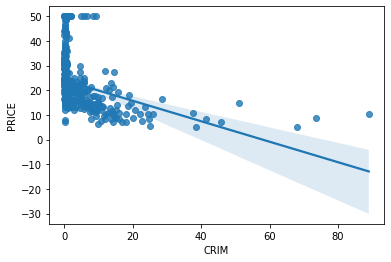

In [9]:
sns.regplot(x='CRIM', y='PRICE', data=df)
plt.show()

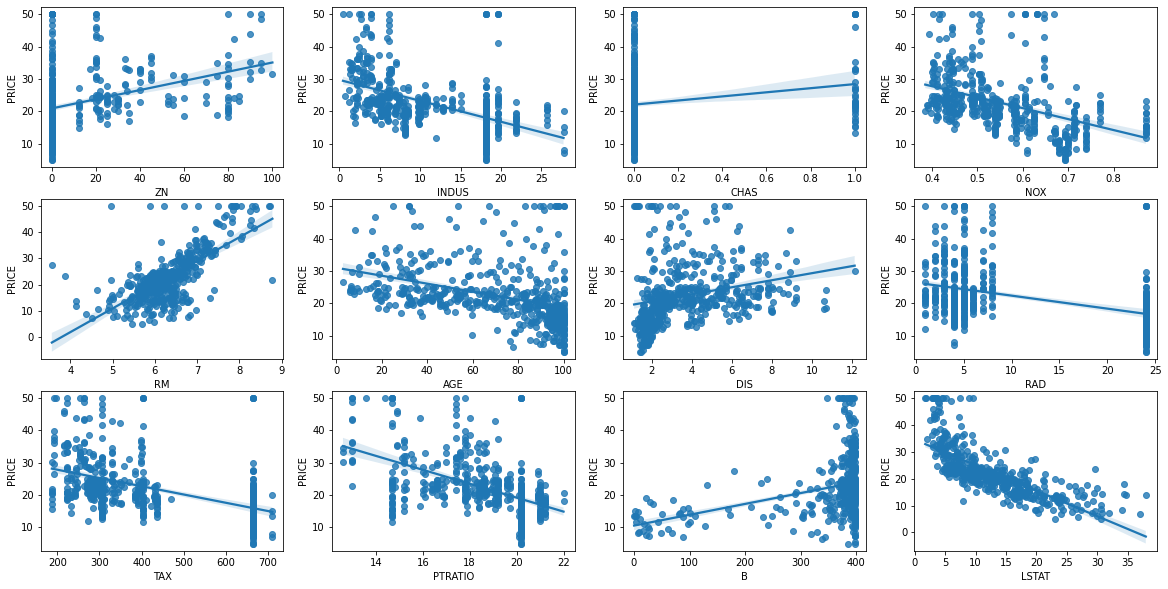

In [15]:
_, ax = plt.subplots(3,4,figsize=(20,10))

for i, feature in enumerate(df.columns[1:-1]):

    r = i // 4;  c = i % 4
    sns.regplot(x=feature, y='PRICE', data=df, ax=ax[r,c])

plt.show()

- Feature별 결정계수(R-squared)

In [16]:
from sklearn.linear_model import LinearRegression

for feature in df.columns[:-1]:
    lr = LinearRegression()
    X = df[feature].values.reshape(-1,1)
    y = df['PRICE'].values

    lr.fit(X, y)
    score = lr.score(X, y)
    print(f'{feature}:\t{score:.4f}')

CRIM:	0.1508
ZN:	0.1299
INDUS:	0.2340
CHAS:	0.0307
NOX:	0.1826
RM:	0.4835
AGE:	0.1421
DIS:	0.0625
RAD:	0.1456
TAX:	0.2195
PTRATIO:	0.2578
B:	0.1112
LSTAT:	0.5441


- 다중 선형회귀

In [17]:
from sklearn.model_selection import train_test_split

# 회귀는 stratify적용 안함
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.2, random_state=2022 
)

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
# R-squared
lr.score(X_train, y_train)

0.7560832029228641

In [21]:
# 계수, Weight, 절편, bias
lr.coef_, lr.intercept_

(array([-1.09358524e-01,  4.17604608e-02,  4.92275845e-02,  2.75483861e+00,
        -1.37425402e+01,  4.71242684e+00, -1.19656681e-02, -1.43522444e+00,
         2.98673854e-01, -1.23637115e-02, -8.95540107e-01,  1.03495304e-02,
        -5.21139480e-01]), 27.615023209546692)

- 회귀식
<pre>
y = CRIM.coef * CRIM + ZN.coef * ZN + ...

- 테스트 데이터에 적용

In [22]:
X_test[0], y_test[0]

(array([1.3960e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01,
        6.1670e+00, 9.0000e+01, 2.4210e+00, 5.0000e+00, 3.8400e+02,
        2.0900e+01, 3.9269e+02, 1.2330e+01]), 20.1)

In [24]:
pred = np.dot(lr.coef_, X_test[0]) + lr.intercept_
print(pred, y_test[0])

21.052394933256554 20.1


In [27]:
# predict 함수 이용
# lr.predict(X_test[0].reshape(1,-1))
lr.predict(X_test[:1])

array([21.05239493])

In [35]:
# 10개의 테스트에 대해서 적용
W = lr.coef_
bias = lr.intercept_

for i in range(10):
    pred1 = np.dot(W, X_test[i]) + bias
    pred2 = lr.predict(X_test[i].reshape(1,-1))[0]
    print(f'실제값: {y_test[i]}\t직접 계산한 예측값: {pred1:.4f}\tLR 예측값: {pred2:.4f}')

실제값: 20.1	직접 계산한 예측값: 21.0524	LR 예측값: 21.0524
실제값: 11.9	직접 계산한 예측값: 6.3091	LR 예측값: 6.3091
실제값: 20.6	직접 계산한 예측값: 21.5262	LR 예측값: 21.5262
실제값: 33.2	직접 계산한 예측값: 36.1581	LR 예측값: 36.1581
실제값: 20.8	직접 계산한 예측값: 18.0311	LR 예측값: 18.0311
실제값: 13.5	직접 계산한 예측값: 13.1798	LR 예측값: 13.1798
실제값: 24.7	직접 계산한 예측값: 24.9517	LR 예측값: 24.9517
실제값: 13.9	직접 계산한 예측값: 12.6253	LR 예측값: 12.6253
실제값: 10.4	직접 계산한 예측값: 6.1811	LR 예측값: 6.1811
실제값: 19.7	직접 계산한 예측값: 13.3863	LR 예측값: 13.3863


### 회귀는 꼭 선형회귀를 써야 하는가?
- LinearRegression, 결정트리, SVM, XGBoost

#### 1. 선형회귀

In [38]:
from sklearn.metrics import r2_score, mean_squared_error

pred_lr =lr.predict(X_test)
r2_lr = r2_score(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)
print(r2_lr, mse_lr)

0.6225687597000796 26.9845081970141


#### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=2022)

dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2022)

In [41]:
pred_dt = dtr.predict(X_test)
r2_dt = r2_score(y_test, pred_dt)
mse_dt = mean_squared_error(y_test, pred_dt)
print(r2_dt, mse_dt)

0.7353132347724971 18.923823529411766


#### Support Vector Machine

In [44]:
from sklearn.svm import SVR

sv = SVR()
sv.fit(X_train, y_train)

SVR()

In [45]:
pred_svm = sv.predict(X_test)
r2_svm = r2_score(y_test, pred_svm)
mse_svm = mean_squared_error(y_test, pred_svm)
print(r2_svm, mse_svm)

0.3080993151888275 49.467552516242236


#### RandomForest

In [46]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=2022)
rfr.fit(X_train, y_train)
pred_rfr = rfr.predict(X_test)
r2_rfr = r2_score(y_test, pred_rfr)
mse_rfr = mean_squared_error(y_test, pred_rfr)
print(r2_rfr, mse_rfr)

0.8017061249172668 14.177052999999995


#### XGBoost

In [48]:
from xgboost import XGBRegressor

xgr = XGBRegressor(random_state=2022, objective='reg:squarederror')
xgr.fit(X_train, y_train)
pred_xgr = xgr.predict(X_test)
r2_xgr = r2_score(y_test, pred_xgr)
mse_xgr = mean_squared_error(y_test, pred_xgr)
print(r2_xgr, mse_xgr)

0.7760328377025039 16.012568864401036


#### 비교

In [50]:
print('LR\tDT\tSVM\tRF\tXG')
print(f'{r2_lr:.4f}\t{r2_dt:.4f}\t{r2_svm:.4f}\t{r2_rfr:.4f}\t{r2_xgr:.4f}')
print(f'{mse_lr:.4f}\t{mse_dt:.4f}\t{mse_svm:.4f}\t{mse_rfr:.4f}\t{mse_xgr:.4f}')

LR	DT	SVM	RF	XG
0.6226	0.7353	0.3081	0.8017	0.7760
26.9845	18.9238	49.4676	14.1771	16.0126


In [52]:
df = pd.DataFrame({
    'y_test' : y_test, 'LR': pred_lr, 
    'DT': pred_dt, 'SVM':pred_svm, 
    'RF':pred_rfr, 'XG': pred_xgr
})

df.head()

,y_test,LR,DT,SVM,RF,XG
0,20.1,21.052395,20.4,20.794067,20.128,20.573149
1,11.9,6.309071,13.8,16.708575,13.190,17.613409
2,20.6,21.526247,23.0,17.683103,21.152,21.409130
3,33.2,36.158114,34.6,24.157037,34.464,33.476273
4,20.8,18.031103,23.1,15.959578,19.411,18.880611
